## **Bibliotecas**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
import json
%matplotlib inline

## **Estilos**

https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

In [2]:
plt.rcParams['figure.figsize'] = (10, 7) #(width,height)
plt.rcParams['axes.grid'] = True
plt.rcParams['text.usetex'] = True
plt.rcParams['savefig.transparent'] = True

## Importando resultados

In [3]:
greedy = pd.read_json(os.path.join('..','results','result_greedy.json')).T

In [4]:
def get_values(grasp, key):
    all_values = []
    for instancia in instancias:
        all_values.append(list(grasp[instancia][key].values()))
    temp = []
    for list_value in all_values:
        temp += list_value
    return temp

In [5]:
with open(os.path.join('..','results','result_GRASP.json')) as file:
    grasp = json.loads(file.read())

In [6]:
instancias = ['input1.in','input2.in', 'input3.in', 'input4.in', 'input5.in', 'input6.in', 'input7.in', 'input8.in', 'input9.in', 'input10.in', 'input11.in', 'input12.in', 'input13.in', 'input14.in', 'input15.in', 'input16.in']
janelas = ['Janela - 2','Janela - 3','Janela - 4','Janela - 5','Janela - 6','Janela - 7','Janela - 8','Janela - 9']
col = ['Máx Iterações - 10', 'Máx Iterações - 100', 'Máx Iterações - 1000', 'Máx Iterações - 10000']

In [7]:
idx = pd.MultiIndex.from_product([instancias,janelas],names=['Instâncias', 'Janelas'])
df = pd.DataFrame(data='-', index=idx, columns=col)

In [8]:
df['Máx Iterações - 10'] = get_values(grasp,'Máx Iterações - 10')
df['Máx Iterações - 100'] = get_values(grasp,'Máx Iterações - 100')
df['Máx Iterações - 1000'] = get_values(grasp,'Máx Iterações - 1000')
df['Máx Iterações - 10000'] = get_values(grasp,'Máx Iterações - 10000')

In [9]:
grasp = df

In [10]:
exact = pd.read_json(os.path.join('..','results','result_exact.json')).T

# Escolhendo melhor iteração e janela - GRASP

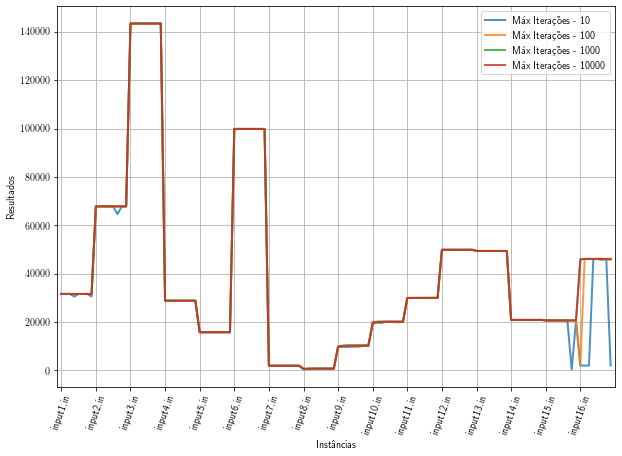

In [11]:
grasp.plot(lw=2, alpha=0.8)
plt.xticks(np.arange(0,128,8), instancias.copy(), rotation=70)
plt.axis(xmin=-1, xmax=len(grasp.index))
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Resultados')
plt.savefig(os.path.join('..','imgs/')+'all_grasp.pdf', bbox_inches='tight', transparent=True)

In [12]:
gap_grasp = grasp.copy()

In [13]:
index_exact = 0
for i in range(len(gap_grasp)):
    if i!=0 and i%8 == 0:
        index_exact = index_exact + 1
    gap_grasp.iloc[i] = ((exact.loc[exact.index[index_exact]].values[0]-gap_grasp.iloc[i])/exact.loc[exact.index[index_exact]].values[0])*100

Text(0, 0.5, 'GAP/Instância')

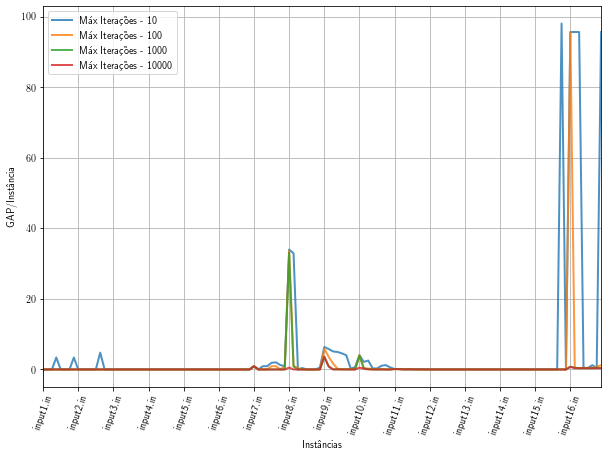

In [14]:
gap_grasp.plot(lw=2, alpha=0.8)
plt.xticks(np.arange(0,128,8), instancias.copy(), rotation=70)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('GAP/Instância')
# plt.savefig(os.path.join('..','imgs/')+'gap_all_grasp.pdf', bbox_inches='tight', transparent=True)

In [15]:
print(gap_grasp.mean().to_latex())

\begin{tabular}{lr}
\toprule
{} &         0 \\
\midrule
Máx Iterações - 10    &  4.811709 \\
Máx Iterações - 100   &  1.217037 \\
Máx Iterações - 1000  &  0.370746 \\
Máx Iterações - 10000 &  0.080223 \\
\bottomrule
\end{tabular}



In [16]:
grasp_10k = grasp[['Máx Iterações - 10000']]

In [ ]:
all_windows_ocurr = []
for inst in instancias:
    ocurr = np.where(grasp_10k.loc[inst].values == grasp_10k.loc[inst].values.max())[0]
    print(ocurr)
    all_windows_ocurr += list(ocurr)

In [18]:
gm

In [19]:
best_arange #index 5 = janela 7

[5, 16]

In [20]:
grasp_10k = grasp_10k.xs('Janela - 7',axis=0,level="Janelas")

In [21]:
grasp_10k.index.name = ""
grasp_10k.columns = ["GRASP 10000 it"]

In [22]:
grasp_10k #10000 iteracoes

,GRASP 10000 it
,
input1.in,31621
input2.in,67829
input3.in,143449
input4.in,28840
input5.in,15785
input6.in,99861
input7.in,1940
input8.in,741
input9.in,10281


In [23]:
grasp_1k = grasp[['Máx Iterações - 1000']]

In [24]:
all_windows_ocurr = []
for inst in instancias:
    ocurr = np.where(grasp_1k.loc[inst].values == grasp_1k.loc[inst].values.max())[0]
    all_windows_ocurr += list(ocurr)

In [25]:
best_window = 0
for i in range(len(janelas)):
    if all_windows_ocurr.count(i) > best_window:
        best_window = all_windows_ocurr.count(i)
        best_arange = [i,best_window]

In [26]:
best_arange #index 5 = janela 7

[5, 16]

In [27]:
grasp_1k = grasp_1k.xs('Janela - 7',axis=0,level="Janelas")

In [28]:
grasp_1k.index.name = ""
grasp_1k.columns = ["GRASP 1000 it"]

In [29]:
grasp_1k

,GRASP 1000 it
,
input1.in,31621
input2.in,67829
input3.in,143449
input4.in,28840
input5.in,15785
input6.in,99861
input7.in,1940
input8.in,741
input9.in,10281


In [30]:
with open(os.path.join('..','results','time_GRASP.json')) as file:
    time_grasp = json.loads(file.read())

In [31]:
idx = pd.MultiIndex.from_product([instancias,janelas],names=['Instâncias', 'Janelas'])
df = pd.DataFrame(data='-', index=idx, columns=col)

In [32]:
df['Máx Iterações - 10'] = get_values(time_grasp,'Máx Iterações - 10')
df['Máx Iterações - 100'] = get_values(time_grasp,'Máx Iterações - 100')
df['Máx Iterações - 1000'] = get_values(time_grasp,'Máx Iterações - 1000')
df['Máx Iterações - 10000'] = get_values(time_grasp,'Máx Iterações - 10000')

In [33]:
time_grasp = df

In [34]:
time_grasp1k = time_grasp.xs(key="Janela - 7", axis=0, level="Janelas")[["Máx Iterações - 1000"]]
time_grasp10k = time_grasp.xs(key="Janela - 7", axis=0, level="Janelas")[["Máx Iterações - 10000"]]

In [35]:
time_grasp_cmp = pd.concat([time_grasp1k,time_grasp10k], sort=False,axis=1)

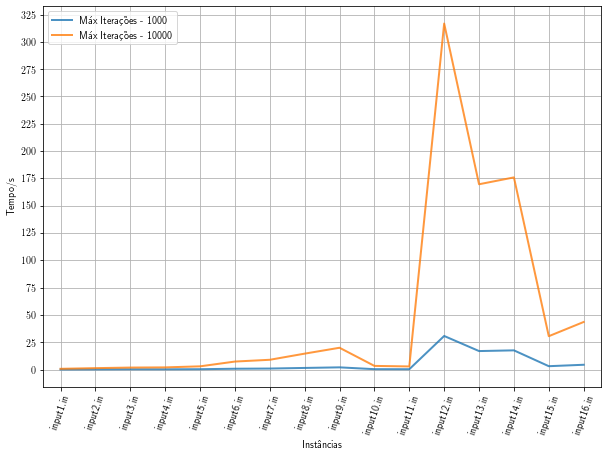

In [36]:
time_grasp_cmp.plot(lw=2, alpha=0.8, ls="-")
plt.xticks(np.arange(len(instancias)), instancias, rotation=70)
plt.yticks(np.arange(0,350, 25))
plt.axis(xmin=-.5, xmax=len(greedy.index)-0.5)
plt.legend(loc='upper left')
plt.xlabel('Instâncias')
plt.ylabel('Tempo/s')
plt.savefig(os.path.join('..','imgs/')+'grasp_compare_1kvs10k.pdf', bbox_inches='tight', transparent=True)

In [37]:
print(time_grasp_cmp.sum().to_latex())

\begin{tabular}{lr}
\toprule
{} &           0 \\
\midrule
Máx Iterações - 1000  &   79.166350 \\
Máx Iterações - 10000 &  801.770529 \\
\bottomrule
\end{tabular}



In [38]:
801.770529/79.166350

10.127668245409824

In [39]:
grasp_compare = pd.concat([grasp_1k, grasp_10k], sort=False,axis=1)

In [40]:
grasp_compare

,GRASP 1000 it,GRASP 10000 it
,,
input1.in,31621,31621
input2.in,67829,67829
input3.in,143449,143449
input4.in,28840,28840
input5.in,15785,15785
input6.in,99861,99861
input7.in,1940,1940
input8.in,741,741
input9.in,10281,10281


In [41]:
gap_grasp = pd.DataFrame(list(map(lambda x,y: ((y-x)/y)*100, grasp_compare.values, exact.values)), columns=grasp_compare.columns, index=grasp_compare.index)

In [42]:
print(gap_grasp.mean().to_latex())

\begin{tabular}{lr}
\toprule
{} &         0 \\
\midrule
GRASP 1000 it  &  0.022221 \\
GRASP 10000 it &  0.021815 \\
\bottomrule
\end{tabular}



In [43]:
grasp = grasp_1k

In [44]:
grasp.columns = ["GRASP"]

## **Escolhendo melhor resultado guloso**

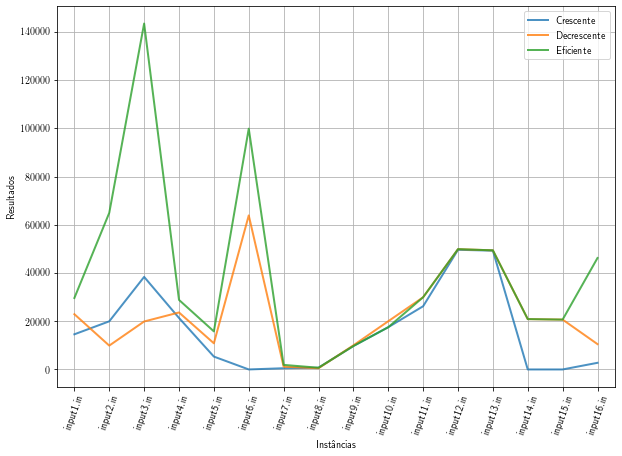

In [45]:
greedy.plot(lw=2, alpha=0.8, ls="-")
plt.xticks(np.arange(len(greedy.index)), list(greedy.index), rotation=70)
plt.axis(xmin=-.5, xmax=len(greedy.index)-0.5)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Resultados')
plt.savefig(os.path.join('..','imgs/')+'greedy_compare.pdf', bbox_inches='tight', transparent=True)

In [46]:
gap_greedy = pd.DataFrame(list(map(lambda x,y: ((y-x)/y)*100, greedy.values, exact.values)), columns=greedy.columns, index=greedy.index)

In [47]:
print(gap_greedy.mean().to_latex())

\begin{tabular}{lr}
\toprule
{} &          0 \\
\midrule
Crescente   &  49.594312 \\
Decrescente &  27.347272 \\
Eficiente   &   2.213083 \\
\bottomrule
\end{tabular}



In [48]:
# gap_greedy.mean().plot.bar(color=['r','b','y'])
# # plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.xticks(rotation=0)
# plt.xlabel('Heurística gulosa')
# plt.ylabel('GAP médio')

## Comparação das Heurísticas

In [49]:
greedy.drop(["Crescente", "Decrescente"], axis=1, inplace=True)

In [50]:
results = pd.concat([greedy, grasp], sort=False, axis=1)

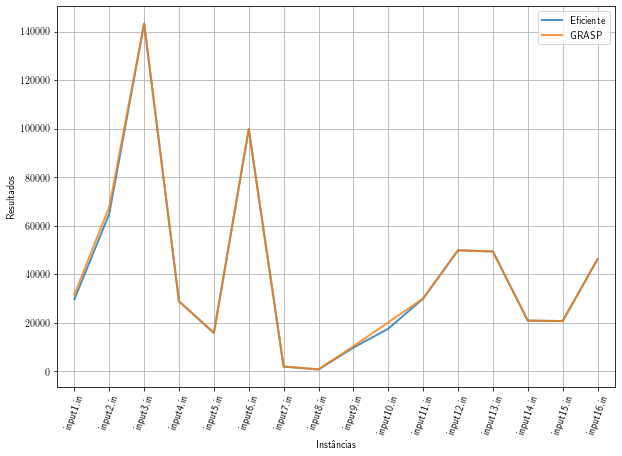

In [51]:
results.plot(lw=2, alpha=0.8, ls="-")
plt.xticks(np.arange(len(results.index)), list(results.index), rotation=70)
plt.axis(xmin=-.5, xmax=len(results.index)-0.5)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Resultados')
plt.savefig(os.path.join('..','imgs/')+'heuristics_compare.pdf', bbox_inches='tight', transparent=True)

## **Adicionando os resultados exatos**

In [72]:
results = pd.concat([results, exact], sort=False, axis=1)

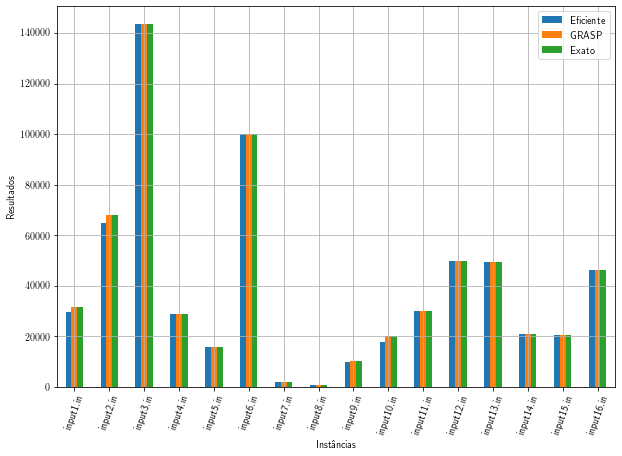

In [83]:
results.plot(kind="bar")

plt.xticks(np.arange(len(results.index)), list(results.index), rotation=70)
plt.axis(xmin=-.5, xmax=len(results.index)-0.5)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xlabel('Instâncias')
plt.ylabel('Resultados')
plt.savefig(os.path.join('..','imgs/')+'final_compare.pdf', bbox_inches='tight', transparent=True)

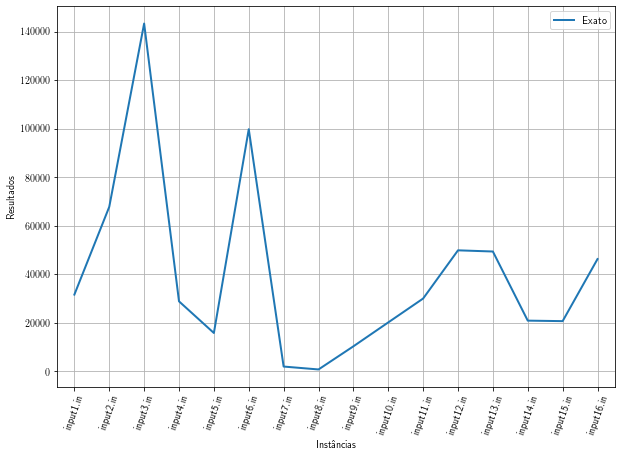

In [53]:
exact.plot(lw=2, alpha=1, ls="-")
plt.xticks(np.arange(len(results.index)), list(results.index), rotation=70)
plt.axis(xmin=-.5, xmax=len(results.index)-0.5)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Resultados')
plt.savefig(os.path.join('..','imgs/')+'exact_results.pdf', bbox_inches='tight', transparent=True)

## **Cálculo do GAP**

In [54]:
results.drop(["Exato"],axis=1,inplace=True)

In [85]:
gap = pd.DataFrame(list(map(lambda x,y: ((y-x)/y)*100, results.values, exact.values)), columns=results.columns, index=results.index)

In [86]:
gap

,Eficiente,GRASP,Exato
,,,
input1.in,6.277474,0.000000,0.0
input2.in,4.260714,0.000000,0.0
input3.in,0.000000,0.000000,0.0
input4.in,0.000000,0.000000,0.0
input5.in,0.000000,0.000000,0.0
input6.in,0.000000,0.000000,0.0
input7.in,2.371134,0.000000,0.0
input8.in,3.643725,0.000000,0.0
input9.in,5.485848,0.000000,0.0


In [88]:
gap.sum()/16

Eficiente    2.213083
GRASP        0.022221
Exato        0.000000
dtype: float64

In [57]:
print(gap.mean().to_latex())

\begin{tabular}{lr}
\toprule
{} &         0 \\
\midrule
Eficiente &  2.213083 \\
GRASP     &  0.022221 \\
\bottomrule
\end{tabular}



# **TEMPO DE EXECUÇÃO**

In [58]:
time_greedy = pd.read_json(os.path.join('..','results','time_greedy.json')).T

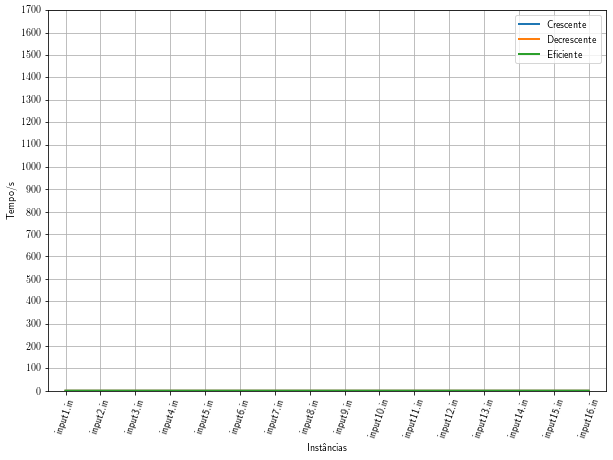

In [59]:
time_greedy.plot(lw=2, alpha=1, ls="-")
plt.xticks(np.arange(len(results.index)), list(results.index), rotation=70)
plt.yticks(np.arange(0,1800,100))
plt.axis(xmin=-.5, xmax=len(results.index)-0.5)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Tempo/s')
plt.savefig(os.path.join('..','imgs/')+'time_greedy.pdf', bbox_inches='tight', transparent=True)

In [60]:
print(time_greedy.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Crescente &  Decrescente &  Eficiente \\
\midrule
input1.in  &   0.000012 &     0.000008 &   0.000049 \\
input2.in  &   0.000018 &     0.000014 &   0.000045 \\
input3.in  &   0.000025 &     0.000017 &   0.000059 \\
input4.in  &   0.000026 &     0.000018 &   0.000049 \\
input5.in  &   0.000045 &     0.000034 &   0.000087 \\
input6.in  &   0.000077 &     0.000069 &   0.000148 \\
input7.in  &   0.000118 &     0.000106 &   0.000224 \\
input8.in  &   0.000154 &     0.000142 &   0.000289 \\
input9.in  &   0.000445 &     0.000385 &   0.000795 \\
input10.in &   0.000045 &     0.000034 &   0.000086 \\
input11.in &   0.000045 &     0.000034 &   0.000082 \\
input12.in &   0.006163 &     0.005863 &   0.009826 \\
input13.in &   0.003582 &     0.003231 &   0.011252 \\
input14.in &   0.003107 &     0.002837 &   0.004796 \\
input15.in &   0.000520 &     0.000430 &   0.000859 \\
input16.in &   0.000464 &     0.000416 &   0.000832 \\
\bottomrule
\end{tabular}



In [61]:
time_greedy.drop(["Crescente", "Decrescente"], axis=1, inplace=True)

In [62]:
time_grasp1k.columns = ["GRASP"]

In [63]:
time_exact = pd.read_json(os.path.join('..','results','time_exact.json')).T

In [64]:
time_exact.max()/60

Exato    28.588288
dtype: float64

In [65]:
2000/100

20.0

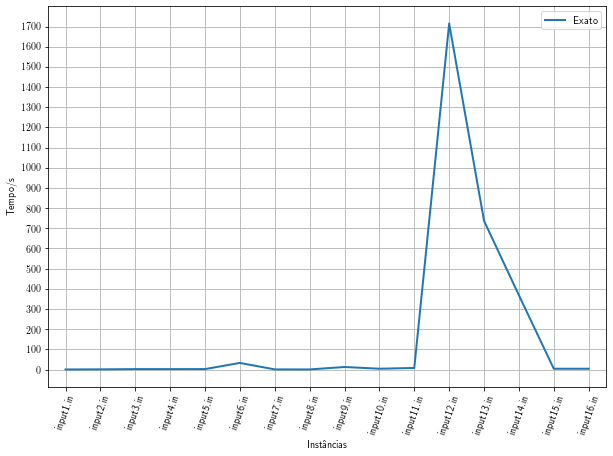

In [66]:
time_exact.plot(lw=2, alpha=1, ls="-")
plt.xticks(np.arange(len(results.index)), list(results.index), rotation=70)
plt.yticks(np.arange(0,1800,100))
plt.axis(xmin=-.5, xmax=len(results.index)-0.5)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Tempo/s')
plt.savefig(os.path.join('..','imgs/')+'exact_time.pdf', bbox_inches='tight', transparent=True)

In [67]:
time = pd.concat([time_greedy, time_grasp1k, time_exact], sort=False, axis=1)

In [84]:
time.sum()

Eficiente       0.029479
GRASP          79.166350
Exato        2893.456222
dtype: float64

In [68]:
time

,Eficiente,GRASP,Exato
Instâncias,,,
input1.in,0.000049,0.066000,0.296650
input2.in,0.000045,0.123966,0.826595
input3.in,0.000059,0.225308,1.984176
input4.in,0.000049,0.200993,2.038222
input5.in,0.000087,0.292778,2.175779
input6.in,0.000148,0.727401,32.647422
input7.in,0.000224,0.891096,0.589077
input8.in,0.000289,1.454202,0.389751
input9.in,0.000795,1.990940,12.474079


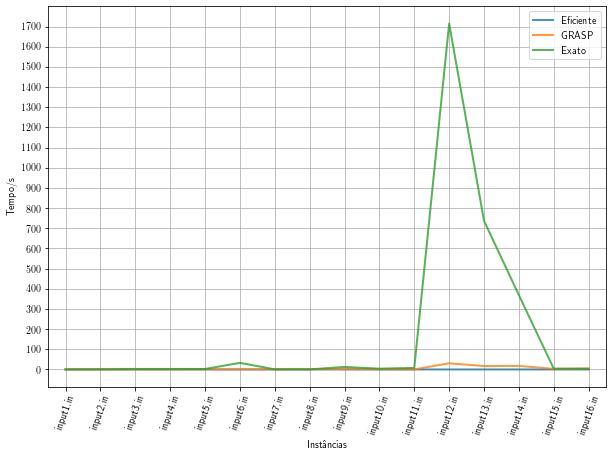

In [69]:
time.plot(lw=2, alpha=0.8, ls="-")
plt.xticks(np.arange(len(results.index)), list(results.index), rotation=70)
plt.yticks(np.arange(0,1800,100))
plt.axis(xmin=-.5, xmax=len(results.index)-0.5)
# plt.legend(loc='upper left')
plt.xlabel('Instâncias')
plt.ylabel('Tempo/s')
plt.savefig(os.path.join('..','imgs/')+'time_final_cmp.pdf', bbox_inches='tight', transparent=True)

In [70]:
print(time.sum().to_latex())

\begin{tabular}{lr}
\toprule
{} &            0 \\
\midrule
Eficiente &     0.029479 \\
GRASP     &    79.166350 \\
Exato     &  2893.456222 \\
\bottomrule
\end{tabular}

